In [28]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

In [3]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [4]:
#상수항 결합
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [6]:
# 상수항 결합(함수사용)
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

### Numpy를 이용한 선형 회귀분석

In [7]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [8]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

In [9]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

array([[99.79150869],
       [86.96171201]])

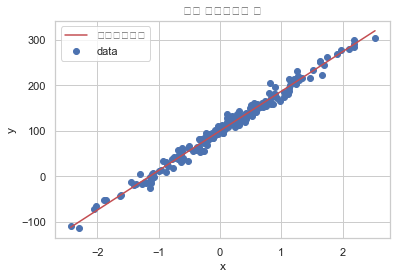

In [10]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="회귀분석결과")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [11]:
# 함수 적용
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.coef_, model.intercept_)

[[86.96171201]] [99.79150869]


In [12]:
# 2차원 배열을 사용해야한다!!
model.predict([[3]])

array([[360.67664473]])

### 주된 사용법(statsmodels)

In [13]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          8.17e-182
Time:                        15:05:54   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

In [14]:
result.predict([[1, 3]])

array([360.67664473])

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        15:11:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [18]:
x_new = dfX0.mean().values
x_new

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [19]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T,
                                       columns=boston.feature_names),
                          has_constant="add")
dfx_new

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063


In [20]:
result_boston2.predict(dfx_new)

0    22.532806
dtype: float64

In [21]:
dfy.mean()

MEDV    22.532806
dtype: float64

In [22]:
result_boston2.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

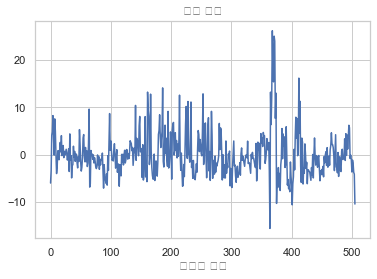

In [23]:
# 잔차벡터
result_boston2.resid.plot()
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.show()

In [25]:
result_boston2.resid.sum() # 거의 0

3.247180302423658e-12

In [32]:
### 과제
from sklearn.datasets import load_diabetes
db = load_diabetes()

dfX0 = pd.DataFrame(db.data, columns=db.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(db.target, columns=["MEDV"])

model_db2 = sm.OLS(dfy, dfX)
result_db2 = model_db2.fit()
print(result_db2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           3.83e-62
Time:                        15:16:45   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0